TITLE
====

Introduction
====

Importing Libraries
====

In [1]:
#Normal Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc

#Train/Test or CV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score

#DataWrangling
from scipy import stats
from scipy.stats.mstats import normaltest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
import datetime

Importing Data
====

In [2]:
#import filetype
df1 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_January_2019.csv")
df2 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_February_2019.csv")
df3 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_March_2019.csv")
df4 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_April_2019.csv")
df5 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_May_2019.csv")
df6 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_June_2019.csv")
df7 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_July_2019.csv")
df8 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_August_2019.csv")
df9 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_September_2019.csv")
df10 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_October_2019.csv")
df11 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_November_2019.csv")
df12 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_December_2019.csv")

In [3]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
#Merge
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
df = pd.concat(dfs)

FIRST EDA
====

In [5]:
#check top 5 rows
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
#check column names
print(df.columns.tolist())

['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']


In [7]:
#Change Column Name if necessary
df.rename({'Order ID': 'Order_ID', 'Quantity Ordered': 'Quantity_Ordered','Price Each':'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'}, axis=1, inplace=True)

In [8]:
#quick summary stats:numeric
df.describe().T

,count,unique,top,freq
Order_ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity_Ordered,186305,10,1,168552
Price_Each,186305,24,11.95,21903
Order_Date,186305,142396,Order Date,355
Purchase_Address,186305,140788,Purchase Address,355


In [9]:
#quick summary stats:categorical
df.describe(include='object')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [10]:
#look at rows/columns
df.shape

(186850, 6)

In [11]:
#look at objects counts
print(df.dtypes.value_counts())

object    6
dtype: int64


In [12]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Order_ID : ['141234' '141235' '141236' ... '319668' '319669' '319670']
Product : ['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']
Quantity_Ordered : ['1' '2' '3' '5' '4' nan '7' 'Quantity Ordered' '6' '9' '8']
Price_Each : ['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0' nan
 'Price Each' '700.0' '150.0' '300.0' '1700.0' '400.0']
Order_Date : ['01/22/19 21:25' '01/28/19 14:15' '01/17/19 13:33' ... '12/01/19 12:01'
 '12/09/19 06:43' '12/03/19 10:39']
Purchase_Address : ['944 Walnut St, Boston, MA 02215' '185 Maple St, Portland, OR 97035'
 '538 Ad

In [13]:
df = df[df.Quantity_Ordered != 'Quantity Ordered']
df = df[df.Price_Each != 'Price Each']

In [14]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Order_ID : ['141234' '141235' '141236' ... '319668' '319669' '319670']
Product : ['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan]
Quantity_Ordered : ['1' '2' '3' '5' '4' nan '7' '6' '9' '8']
Price_Each : ['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0' nan
 '700.0' '150.0' '300.0' '1700.0' '400.0']
Order_Date : ['01/22/19 21:25' '01/28/19 14:15' '01/17/19 13:33' ... '12/01/19 12:01'
 '12/09/19 06:43' '12/03/19 10:39']
Purchase_Address : ['944 Walnut St, Boston, MA 02215' '185 Maple St, Portland, OR 97035'
 '538 Adams St, San Francisco, CA 94016' ...
 '273

Data Wrangling
===

Check Nulls
====

In [15]:
#check for null
df.isnull().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

In [16]:
#replacing null values with panda null values
df = df.replace('$nan$', np.NaN)

In [17]:
#check for null after
df.isnull().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

Replace/Drop Nulls
====

In [18]:
#drop all rows with nulls
df = df.dropna()

In [19]:
#reset index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

In [20]:
#check for null after
df.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

Look for Duplicates
====

In [21]:
#look for duplicates
df.duplicated().sum()

264

In [22]:
#drop duplicates
df = df.drop_duplicates()

In [23]:
#look for duplicates
df.duplicated().sum()

0

Look for Outliers
====

In [24]:
#summary stats
df.describe().T

,count,unique,top,freq
Order_ID,185686,178437,160873,5
Product,185686,19,USB-C Charging Cable,21859
Quantity_Ordered,185686,9,1,168291
Price_Each,185686,23,11.95,21859
Order_Date,185686,142395,12/15/19 20:16,8
Purchase_Address,185686,140787,"193 Forest St, San Francisco, CA 94016",9


In [25]:
#quick summary stats:categorical
df.describe(include='object')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
count,185686,185686,185686,185686,185686,185686
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21859,168291,21859,8,9


In [26]:
df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [27]:
#Object > Float
df['Quantity_Ordered'] = df['Quantity_Ordered'].astype(float)
df['Price_Each'] = df['Price_Each'].astype(float)

In [28]:
out = df.loc[:,['Quantity_Ordered', 'Price_Each']]
z = np.abs(stats.zscore(out))
print(z)
threshold = 3
print(np.where(z > 3))

        Quantity_Ordered  Price_Each
0               0.281094    1.548721
1               0.281094    0.509457
2               1.975898    0.518350
3               0.281094    0.103740
4               0.281094    0.518350
...                  ...         ...
185945          0.281094    0.509457
185946          1.975898    0.542836
185947          0.281094    0.647395
185948          0.281094    0.518350
185949          0.281094    0.253961

[185686 rows x 2 columns]
(array([    11,     12,     52, ..., 185636, 185654, 185656], dtype=int64), array([1, 0, 0, ..., 1, 1, 1], dtype=int64))


In [29]:
#look at outliers
print(out.loc[[ 11,     12,     52,  185636, 185654, 185656]])

        Quantity_Ordered  Price_Each
11                   1.0     1700.00
12                   3.0        2.99
52                   3.0        2.99
185636               1.0       11.95
185654               1.0       14.95
185656               1.0      149.99


In [30]:
df.loc[df['Price_Each'] > 150]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
6,141240,27in 4K Gaming Monitor,1.0,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
11,141245,Macbook Pro Laptop,1.0,1700.00,01/31/19 10:12,"322 6th St, San Francisco, CA 94016"
14,141248,Flatscreen TV,1.0,300.00,01/03/19 21:54,"363 Spruce St, Austin, TX 73301"
16,141250,Vareebadd Phone,1.0,400.00,01/10/19 11:20,"471 Center St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185936,319657,LG Dryer,1.0,600.00,12/05/19 13:22,"159 Lake St, Portland, OR 97035"
185942,319663,Flatscreen TV,1.0,300.00,12/07/19 08:25,"334 12th St, Atlanta, GA 30301"
185943,319664,ThinkPad Laptop,1.0,999.99,12/30/19 01:06,"767 2nd St, San Francisco, CA 94016"
185944,319665,iPhone,1.0,700.00,12/15/19 11:13,"377 1st St, Atlanta, GA 30301"


Outlier Decision
===

In [31]:
#Not Deleting Any Outlier

Change Data Type
===

In [32]:
#Date
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [33]:
#Adding Quarter and Month Columns for Groupby
df['Order_Day'] = df['Order_Date'].dt.to_period('D')
df['Order_Quarter'] = df['Order_Date'].dt.to_period('Q')
df['Order_Month'] = df['Order_Date'].dt.to_period('M')
df['Quarter'] = df['Order_Date'].dt.quarter
df['Month'] = pd.DatetimeIndex(df['Order_Date']).month

In [34]:
#Getting States / Zip Codes
df["City"] = df["Purchase_Address"].str.split(",", expand=True)[1]
df["Dummy"] = df["Purchase_Address"].str.split(",", expand=True)[2]
df["State"] = df["Dummy"].str.split(" ", expand=True)[1]
df["Zip"] = df["Dummy"].str.split(" ", expand=True)[2]
df.drop(['Dummy'], axis=1, inplace=True)

In [35]:
#Region List
west = ['WA','OR','CA','ID','NV','MT','WY','UT','AZ','CO','NM']
midwest = ['ND','MN','WI','MI','SD','NE','KS','IA','MO','IL','IN','OH']
south = ['TX','OK','AR','LA','MS','TN','KY','AL','GA','FL','SC','NC','VA','WV','MD','DE']
northeast = ['PA','NJ','NY','CT','MA','RI','VT','NH','ME']

In [36]:
#Getting Regions
s=pd.DataFrame([west,midwest,south,northeast],index=['West','Midwest','South','Northeast'])
s=s.reset_index().melt('index')
df['Region'] = df['State'].map(dict(zip(s['value'],s['index'])))

In [37]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Day,Order_Quarter,Order_Month,Quarter,Month,City,State,Zip,Region
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,2019Q1,2019-01,1,1,Boston,MA,02215,Northeast
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,2019Q1,2019-01,1,1,Portland,OR,97035,West
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,2019Q1,2019-01,1,1,San Francisco,CA,94016,West
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,2019Q1,2019-01,1,1,Los Angeles,CA,90001,West
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,2019Q1,2019-01,1,1,Austin,TX,73301,South


Transforming
===

In [38]:
#Calculated/Derived Field
df["Total"] = df["Quantity_Ordered"]  * df["Price_Each"] 

In [39]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Day,Order_Quarter,Order_Month,Quarter,Month,City,State,Zip,Region,Total
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,2019Q1,2019-01,1,1,Boston,MA,02215,Northeast,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,2019Q1,2019-01,1,1,Portland,OR,97035,West,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,2019Q1,2019-01,1,1,San Francisco,CA,94016,West,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,2019Q1,2019-01,1,1,Los Angeles,CA,90001,West,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,2019Q1,2019-01,1,1,Austin,TX,73301,South,11.99


In [40]:
df.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Day,Order_Quarter,Order_Month,Quarter,Month,City,State,Zip,Region,Total
185945,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019-12-11,2019Q4,2019-12,4,12,San Francisco,CA,94016,West,14.95
185946,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019-12-01,2019Q4,2019-12,4,12,Los Angeles,CA,90001,West,7.68
185947,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019-12-09,2019Q4,2019-12,4,12,Seattle,WA,98101,West,400.00
185948,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019-12-03,2019Q4,2019-12,4,12,Dallas,TX,75001,South,11.99
185949,319670,Bose SoundSport Headphones,1.0,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",2019-12-21,2019Q4,2019-12,4,12,Los Angeles,CA,90001,West,99.99


In [41]:
#Creating Category
df['Category'] = 0
#Add to column
df.loc[df['Product'] == 'iPhone', 'Category'] = 'Phone'
df.loc[df['Product'] == 'Vareebadd Phone', 'Category'] = 'Phone'
df.loc[df['Product'] == 'Google Phone', 'Category'] = 'Phone'
df.loc[df['Product'] == '20in Monitor', 'Category'] = 'Monitor'
df.loc[df['Product'] == '27in 4K Gaming Monitor', 'Category'] = 'Monitor'
df.loc[df['Product'] == '27in FHD Monitor', 'Category'] = 'Monitor'
df.loc[df['Product'] == '34in Ultrawide Monitor', 'Category'] = 'Monitor'
df.loc[df['Product'] == 'AA Batteries (4-pack)', 'Category'] = 'Batteries'
df.loc[df['Product'] == 'AAA Batteries (4-pack)', 'Category'] = 'Batteries'
df.loc[df['Product'] == 'Flatscreen TV', 'Category'] = 'TV'
df.loc[df['Product'] == 'LG Washing Machine', 'Category'] = 'Appliance'
df.loc[df['Product'] == 'LG Dryer', 'Category'] = 'Appliance'
df.loc[df['Product'] == 'Lightning Charging Cable', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'Apple Airpods Headphones', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'Wired Headphones', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'Bose SoundSport Headphones', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'USB-C Charging Cable', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'Macbook Pro Laptop', 'Category'] = 'Laptop'
df.loc[df['Product'] == 'ThinkPad Laptop', 'Category'] = 'Laptop'

In [42]:
#look at target variable spread
df['Category'].value_counts(normalize=True)

Accessories    0.490834
Batteries      0.221718
Monitor        0.129224
Phone          0.077696
Laptop         0.047645
TV             0.025818
Appliance      0.007066
Name: Category, dtype: float64

SECOND EDA
====

Frequency Tables
===

In [43]:
#Simple
pd.crosstab(index=df['Price_Each'], columns=df['Product'], margins = True)

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone,All
Price_Each,,,,,,,,,,,,,,,,,,,,
2.99,0,0,0,0,0,20612,0,0,0,0,0,0,0,0,0,0,0,0,0,20612
3.84,0,0,0,0,20558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20558
11.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21859,0,0,0,21859
11.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18849,0,18849
14.95,0,0,0,0,0,0,0,0,0,0,0,0,21610,0,0,0,0,0,0,21610
99.99,0,0,0,0,0,0,0,13298,0,0,0,0,0,0,0,0,0,0,0,13298
109.99,4098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4098
149.99,0,0,7498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7498
150.0,0,0,0,0,0,0,15525,0,0,0,0,0,0,0,0,0,0,0,0,15525


In [44]:
totalorderday = df.groupby(['Order_Day','Region','Category'])['Total'].sum().T
totalordermonth = df.groupby(['Order_Month'])['Total'].sum().T
totalmonth = df.groupby(['Month'])['Total'].sum().T
totalquarter = df.groupby(['Quarter'])['Total'].sum().T

In [47]:
totalordermonth = pd.DataFrame(totalordermonth)
#Finished Dataset for Use CSV
totalordermonth.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Month_Processed.csv')

In [48]:
totalorderday = pd.DataFrame(totalorderday)
totalorderday.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Day_Processed.csv')

In [49]:
totalmonth = pd.DataFrame(totalmonth)
totalmonth

,Total
Month,
1,1821413.16
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2576280.15
7,2646461.32
8,2241083.37
9,2094465.69


<AxesSubplot:xlabel='Month', ylabel='Total'>

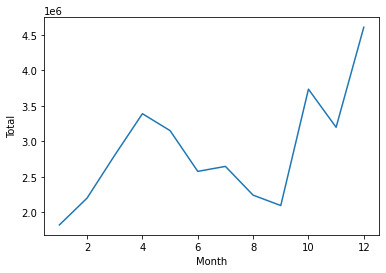

In [50]:
sns.lineplot(data=totalmonth, x="Month", y="Total")

In [51]:
totalquarter = pd.DataFrame(totalquarter)  
totalquarter

,Total
Quarter,
1,6826464.59
2,9116114.36
3,6982010.38
4,11540948.61


<AxesSubplot:xlabel='Quarter', ylabel='Total'>

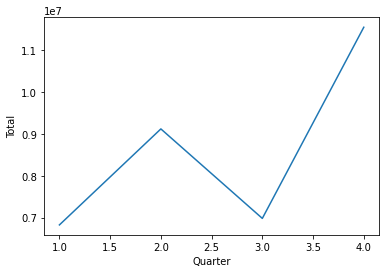

In [52]:
sns.lineplot(data=totalquarter, x="Quarter", y="Total")

Looking at Data Types
====

In [53]:
#quick summary stats:numeric
df.describe()

,Quantity_Ordered,Price_Each,Quarter,Month,Total
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,2.681317,7.058653,185.611936
std,0.443069,332.843838,1.135367,3.502932,333.032118
min,1.000000,2.990000,1.000000,1.000000,2.990000
25%,1.000000,11.950000,2.000000,4.000000,11.950000
50%,1.000000,14.950000,3.000000,7.000000,14.950000
75%,1.000000,150.000000,4.000000,10.000000,150.000000
max,9.000000,1700.000000,4.000000,12.000000,3400.000000


In [54]:
#quick summary stats:categorical
df.describe(include='object')

,Order_ID,Product,Purchase_Address,City,State,Zip,Region,Category
count,185686,185686,185686,185686,185686,185686,185686,185686
unique,178437,19,140787,9,8,10,3,7
top,160873,USB-C Charging Cable,"193 Forest St, San Francisco, CA 94016",San Francisco,CA,94016,West,Accessories
freq,5,21859,9,44662,74226,44662,98937,91141


In [55]:
#drop Column
df.drop(['Month', 'Quarter'], axis=1, inplace=True)

In [56]:
#Finished Dataset for Use CSV
df.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Processed.csv')

Final Process Finish
====

In [205]:
df = pd.read_csv(r"C:\Users\2-1\Downloads\Sales_Day_Processed.csv")

In [206]:
df.head()

,Order_Day,Region,Category,Total
0,2019-01-01,Northeast,Accessories,1829.92
1,2019-01-01,Northeast,Appliance,600.00
2,2019-01-01,Northeast,Batteries,80.67
3,2019-01-01,Northeast,Laptop,5100.00
4,2019-01-01,Northeast,Monitor,2699.91


In [207]:
#quick summary stats:numeric
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,7261.0,4746.665465,5225.553913,5.98,900.0,3019.88,6850.41,38599.92


In [208]:
#quick summary stats:categorical
df.describe(include='object')

,Order_Day,Region,Category
count,7261,7261,7261
unique,366,3,7
top,2019-06-17,West,Accessories
freq,21,2502,1098


In [209]:
#Drop Day
df.drop(['Order_Day'], axis=1, inplace=True)

In [210]:
#reset index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

In [211]:
### Look at Unique Variables
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
Region,3
Category,7
Total,3183


In [212]:
#look at binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'].between(1, 2, inclusive = 'both')].index)
binary_variables

[]

In [213]:
#look at multi-nominal
categorical_variables = list(df_uniques[(10 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['Region', 'Category']

In [214]:
#look for ordinal/nominal in each categorical
[[i, list(df[i].unique())] for i in categorical_variables]

[['Region', ['Northeast', 'South', 'West']],
 ['Category',
  ['Accessories',
   'Appliance',
   'Batteries',
   'Laptop',
   'Monitor',
   'Phone',
   'TV']]]

In [215]:
#specify ordinal
ordinal_variables = []

In [216]:
#specify numeric
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

Data Visualization
===

array([[<AxesSubplot:title={'center':'Total'}>]], dtype=object)

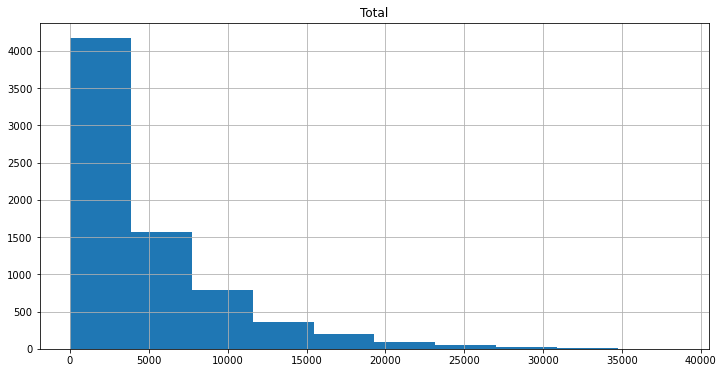

In [217]:
#histogram of numeric values
df[numeric_variables].hist(figsize=(12, 6))

Check Normal Distribution on Features (Skew)
====

In [218]:
#looking at which columns are numbers
df.select_dtypes('number').columns

Index(['Total'], dtype='object')

In [219]:
# Create a list of float colums to check for skewing
mask = df.dtypes == float
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

In [220]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Total,1.903055


In [221]:
# Create a list of int colums to check for skewing
mask2 = df.dtypes == int
int_cols = df.columns[mask2]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals2 = df[int_cols].skew()

In [222]:
# Showing the skewed columns
skew_cols = (skew_vals2
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew


Check Normal Distribution After Transformation: Features
====

In [223]:
normaltest(df.Total)

NormaltestResult(statistic=2781.888655322279, pvalue=0.0)

In [224]:
#Transformed with log
df.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Day_Log_Processed.csv')

Statistics ANOVA
====

In [225]:
#Statistics ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

product_lm = ols('Total ~ C(Category) + C(Region) + C(Category)*C(Region)', data=df).fit()

table = sm.stats.anova_lm(product_lm, typ=2) # Type 2 ANOVA DataFrame

print(table)

                             sum_sq      df            F  PR(>F)
C(Category)            1.057854e+11     6.0  2679.434861     0.0
C(Region)              2.808636e+10     2.0  2134.196549     0.0
C(Category):C(Region)  1.914276e+10    12.0   242.433223     0.0
Residual               4.763977e+10  7240.0          NaN     NaN


Machine Learning
===

Binary: Encoder
===

In [170]:
lb, le, oe = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()
#binary
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

Ordinal: Label Encoder
====

In [171]:
#Ordinal
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

Nominal: Encoder
==

In [172]:
#Nominal
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
df = pd.get_dummies(df, columns = categorical_variables, drop_first=False)

Extract X/Y (Target / Features)
====

In [173]:
#Normal
y, X = df['Total'], df.drop(columns='Total')

In [174]:
#create Train/Test for Feature Selection
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [175]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [177]:
y_prediction =  LR.predict(X_test)
y_prediction

array([6456., 4664., -396., ..., 6940., 3452., 6940.])

In [180]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print(score)

0.6498301354543019


In [182]:
X.columns

Index(['Category_Accessories', 'Category_Appliance', 'Category_Batteries',
       'Category_Laptop', 'Category_Monitor', 'Category_Phone', 'Category_TV',
       'Region_Northeast', 'Region_South', 'Region_West'],
      dtype='object')

In [181]:
print('Intercept: \n', LR.intercept_)
print('Coefficients: \n', LR.coef_)

Intercept: 
 3.573049731816383e+16
Coefficients: 
 [-2.16291034e+16 -2.16291034e+16 -2.16291034e+16 -2.16291034e+16
 -2.16291034e+16 -2.16291034e+16 -2.16291034e+16 -1.41013939e+16
 -1.41013939e+16 -1.41013939e+16]
